In [2]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import os
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
list_tcHW = []
list_cHW = []
for name in sorted(os.listdir('500GeV_res/csv/'),reverse=True):
    if name.split('_')[-1] != '0.0.csv' and name.split('_')[1] == '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename, delimiter= ' ')
        list_tcHW.append(df)
    elif name.split('_')[-1] == '0.0.csv' and name.split('_')[1] != '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename,delimiter= ' ')
        list_cHW.append(df)

In [4]:
list_tcHW[5].head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,tcHW,PT_l1,cHW,PT_j1,PT_j2,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH,xsec
0,0.443965,111.057205,9.059669,383.902802,61.603054,0.682648,186.907166,-0.066667,262.886841,0.0,0.0,0.0,91.570030,0.202517,435.798309,441.690186,0.385835,-1.213758,988.507996,0.006028
1,-0.398395,103.349983,91.364845,322.983704,42.886105,0.667697,64.498192,-0.066667,395.472809,0.0,0.0,0.0,93.491730,0.668996,365.823914,457.178070,0.318238,0.769336,902.395020,0.006028
2,0.049182,106.966377,95.501160,320.781067,63.032467,0.668059,73.186508,-0.066667,403.499817,0.0,0.0,0.0,91.386642,0.674655,379.933411,475.311554,0.210912,-1.817767,875.159302,0.006028
3,0.721019,129.076675,15.814312,247.286438,166.003433,0.102539,117.669830,-0.066667,272.027283,0.0,0.0,0.0,95.980774,0.482377,397.865570,382.575043,0.417550,-2.543832,1019.533447,0.006028
4,-0.781975,121.587837,1.937038,360.389832,21.146715,0.840733,58.915600,-0.066667,320.950562,0.0,0.0,0.0,93.960251,0.729235,367.485779,368.817871,0.674088,0.868725,997.984497,0.006028


In [5]:
tcHW_0d2_df = list_tcHW[0]
tcHW_0d13_df = list_tcHW[1]
tcHW_0d06_df = list_tcHW[2]
tcHW_m0d2_df = list_tcHW[3]
tcHW_m0d13_df = list_tcHW[4]
tcHW_m0d06_df = list_tcHW[5]

In [14]:
list_cHW[5]['cHW'][0]

-0.0099999997764800008

In [15]:
cHW_0d03_df = list_cHW[0]
cHW_0d02_df = list_cHW[1]
cHW_0d01_df = list_cHW[2]
cHW_m0d03_df = list_cHW[3]
cHW_m0d02_df = list_cHW[4]
cHW_m0d01_df = list_cHW[5]

In [16]:
tcHW_0d2_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_0d13_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_0d06_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d2_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d13_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d06_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [17]:
cHW_0d03_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_0d01_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d01_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d02_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d03_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_0d02_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [23]:
y_1 = np.concatenate((np.ones(tcHW_0d2_df.shape[0]), np.zeros(cHW_0d03_df.shape[0])))
y_2 = np.concatenate((np.ones(tcHW_0d13_df.shape[0]), np.zeros(cHW_0d02_df.shape[0])))
y_3 = np.concatenate((np.ones(tcHW_0d06_df.shape[0]), np.zeros(cHW_0d01_df.shape[0])))
y_4 = np.concatenate((np.ones(tcHW_m0d2_df.shape[0]), np.zeros(cHW_m0d03_df.shape[0])))
y_5 = np.concatenate((np.ones(tcHW_m0d13_df.shape[0]), np.zeros(cHW_m0d02_df.shape[0])))
y_6 = np.concatenate((np.ones(tcHW_m0d06_df.shape[0]), np.zeros(cHW_m0d01_df.shape[0])))

In [18]:
X_1 = pd.concat([tcHW_0d2_df, cHW_0d03_df], ignore_index=True)
X_2 = pd.concat([tcHW_0d13_df, cHW_0d02_df], ignore_index=True)
X_3 = pd.concat([tcHW_0d06_df, cHW_0d01_df], ignore_index=True)
X_4 = pd.concat([tcHW_m0d2_df, cHW_m0d03_df], ignore_index=True)
X_5 = pd.concat([tcHW_m0d13_df, cHW_m0d02_df], ignore_index=True)
X_6 = pd.concat([tcHW_m0d06_df, cHW_m0d01_df], ignore_index=True)

In [19]:
from sklearn import preprocessing
scale = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [20]:
for i in [X_1, X_2, X_3, X_4, X_5, X_6]:
    i = scaleColumns(i,['Eta_H', 'M_H', 'PT_ZH',
                    'PT_b1', 'PT_b2', 'Cos_Hb1', 
                    'PT_l2', 'PT_l1', 'M_Z', 
                    'Cos_lZ', 'PT_H', 'PT_ll', 
                    'DPHI_ll', 'phi_H','M_ZH'])

In [21]:
X_1.head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,PT_l1,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH
0,0.399271,0.451557,0.008556,0.776409,0.127477,0.893468,0.086289,0.809959,0.099068,0.905886,0.818433,0.857686,0.202665,0.221713,0.920499
1,0.384832,0.683067,0.036648,0.434960,0.689956,0.518495,0.419318,0.519576,0.098649,0.624265,0.779934,0.790375,0.122293,0.267716,0.897438
2,0.500090,0.632077,0.039593,0.876441,0.116808,0.887619,0.190326,0.871713,0.117340,0.850258,0.917117,0.984628,0.170804,0.514417,0.915660
3,0.380884,0.764760,0.007322,0.542630,0.437185,0.501552,0.450078,0.522204,0.116187,0.594615,0.779120,0.806012,0.146288,0.848645,0.933141
4,0.510310,0.717582,0.030953,0.701270,0.450421,0.686678,0.454726,0.682196,0.118619,0.632828,0.914979,0.977823,0.106594,0.716410,0.917910


In [24]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size=0.8, test_size=0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size=0.8, test_size=0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, train_size=0.8, test_size=0.2)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, train_size=0.8, test_size=0.2)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, train_size=0.8, test_size=0.2)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, train_size=0.8, test_size=0.2)

In [25]:
from sklearn.utils import class_weight
weights_train_1 = class_weight.compute_class_weight('balanced', np.unique(y_train_1),y_train_1)
weights_train_2 = class_weight.compute_class_weight('balanced', np.unique(y_train_2),y_train_2)
weights_train_3 = class_weight.compute_class_weight('balanced', np.unique(y_train_3),y_train_3)
weights_train_4 = class_weight.compute_class_weight('balanced', np.unique(y_train_4),y_train_4)
weights_train_5 = class_weight.compute_class_weight('balanced', np.unique(y_train_5),y_train_5)
weights_train_6 = class_weight.compute_class_weight('balanced', np.unique(y_train_6),y_train_6)

In [26]:
print(weights_train_1)
print(weights_train_2)
print(weights_train_3)
print(weights_train_4)
print(weights_train_5)
print(weights_train_6)

[ 1.00090271  0.99909892]
[ 1.00524246  0.99481193]
[ 0.99914539  1.00085608]
[ 1.01682224  0.98372532]
[ 1.01299237  0.98733668]
[ 1.00563052  0.99443218]


In [27]:
class_weights_dic_1 = dict()
class_weights_dic_2 = dict()
class_weights_dic_3 = dict()
class_weights_dic_4 = dict()
class_weights_dic_5 = dict()
class_weights_dic_6 = dict()

for i in range(len(weights_train_1)):
    class_weights_dic_1[i] = weights_train_1[i]
    class_weights_dic_2[i] = weights_train_2[i]    
    class_weights_dic_3[i] = weights_train_3[i]    
    class_weights_dic_4[i] = weights_train_4[i]
    class_weights_dic_5[i] = weights_train_5[i]
    class_weights_dic_6[i] = weights_train_6[i]  

In [28]:
class_weights_dic_1

{0: 1.0009027081243731, 1: 0.99909891870244294}

In [29]:
param_grid = {
    'loss': ['log'],
    'penalty':['l2', 'l1'],
    'learning_rate':['optimal'],
    'alpha': [10 ** x for x in range(-8, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

In [30]:
clf_1 = SGDClassifier(random_state=42, class_weight=class_weights_dic_1,
                    tol=1e-3,verbose=0)

clf_2 = SGDClassifier(random_state=42, class_weight=class_weights_dic_2,
                    tol=1e-3,verbose=0)

clf_3 = SGDClassifier(random_state=42, class_weight=class_weights_dic_3,
                    tol=1e-3,verbose=0)

clf_4 = SGDClassifier(random_state=42, class_weight=class_weights_dic_4,
                    tol=1e-3,verbose=0)

clf_5 = SGDClassifier(random_state=42, class_weight=class_weights_dic_5,
                    tol=1e-3,verbose=0)

clf_6 = SGDClassifier(random_state=42, class_weight=class_weights_dic_6,
                    tol=1e-3,verbose=0)

In [32]:
from sklearn.metrics import roc_curve, auc

def compare_train_test(clf, X_train, y_train, X_test, y_test, tcHW_value, cHW_value, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    ax[0].hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$\~c_{HW} =$ %s (train)' %tcHW_value)
    ax[0].hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$c_{HW} =$ %s (train)' %cHW_value)
    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='r', label='$\~c_{HW} =$ %s (test)' %tcHW_value)

    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)

    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='b', label='$c_{HW} =$ %s (test)' %cHW_value)

    ax[0].set_xlabel("SGD output")
    ax[0].set_ylabel("Arbitrary units")
    ax[0].legend(loc='best')
    
    ######ROC
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, lw=2.2, alpha=0.7, c='r',
             label='ROC (AUC = %0.2f)' % (roc_auc))
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Chance', alpha=.8)
    ax[1].set_xlim([-0.05, 1.05])
    ax[1].set_ylim([-0.05, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver operating characteristic')
    plt.legend(loc="lower right")


In [33]:
clf_grid_1 = GridSearchCV(estimator=clf_1, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_1.fit(X=X_train_1,y=y_train_1)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0009027081243731, 1: 0.99909891870244294},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
clf_best_1 = clf_grid_1.best_estimator_

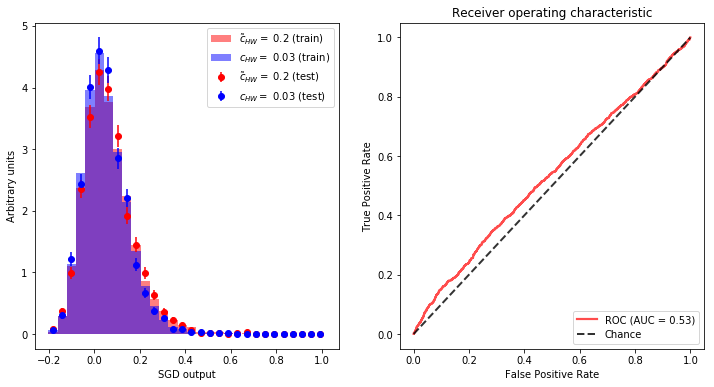

In [35]:
compare_train_test(clf_best_1, X_train_1, y_train_1, 
                   X_test_1, y_test_1, 0.2,0.03)

In [36]:
clf_grid_2 = GridSearchCV(estimator=clf_2, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_2.fit(X=X_train_2,y=y_train_2)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0052424639580604, 1: 0.99481193255512324},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
clf_best_2 = clf_grid_2.best_estimator_

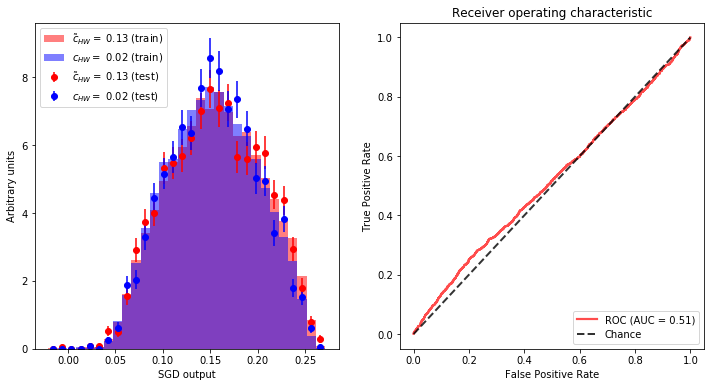

In [38]:
compare_train_test(clf_best_2, X_train_2, y_train_2, 
                   X_test_2, y_test_2, 0.13, 0.02)

In [39]:
clf_grid_3 = GridSearchCV(estimator=clf_3, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_3.fit(X=X_train_3,y=y_train_3)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.99914538507942896, 1: 1.0008560781548999},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
clf_best_3 = clf_grid_3.best_estimator_

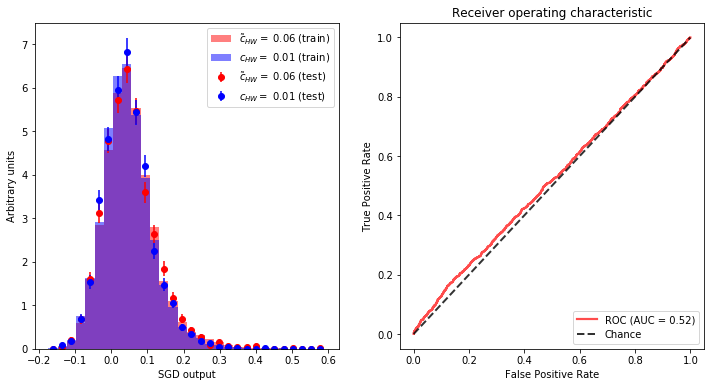

In [41]:
compare_train_test(clf_best_3, X_train_3, y_train_3, 
                   X_test_3, y_test_3, 0.06, 0.01)

In [42]:
clf_grid_4 = GridSearchCV(estimator=clf_4, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_4.fit(X=X_train_4,y=y_train_4)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0168222381782748, 1: 0.98372531507393068},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [43]:
clf_best_4 = clf_grid_4.best_estimator_

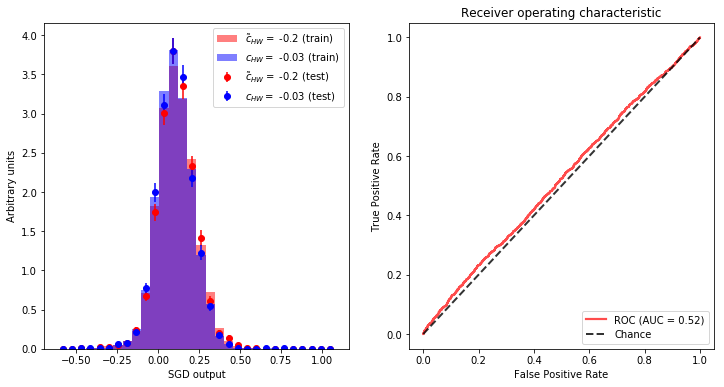

In [44]:
compare_train_test(clf_best_4, X_train_4, y_train_4, 
                   X_test_4, y_test_4, -0.2,-0.03)

In [45]:
clf_grid_5 = GridSearchCV(estimator=clf_5, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_5.fit(X=X_train_5,y=y_train_5)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0129923695607341, 1: 0.98733668341708547},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
clf_best_5 = clf_grid_5.best_estimator_

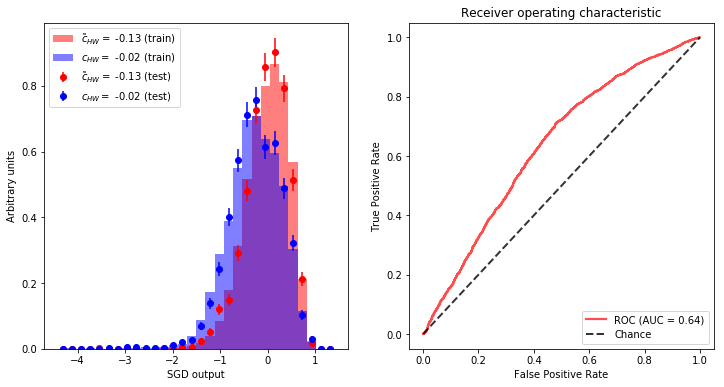

In [47]:
compare_train_test(clf_best_5, X_train_5, y_train_5, 
                   X_test_5, y_test_5, -0.13, -0.02)

In [48]:
clf_grid_6 = GridSearchCV(estimator=clf_6, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_6.fit(X=X_train_6,y=y_train_6)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0056305163842953, 1: 0.9944321829855538},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [49]:
clf_best_6 = clf_grid_6.best_estimator_

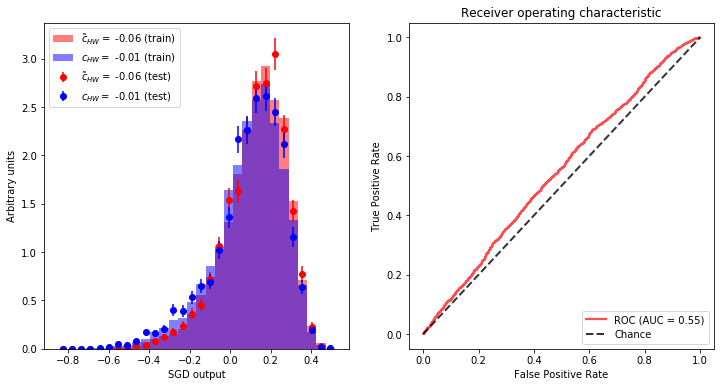

In [50]:
compare_train_test(clf_best_6, X_train_6, y_train_6, 
                   X_test_6, y_test_6, -0.06, -0.01)